# Project: Investigate TMDb Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, i used the TMDb Kaggle movies data set that contains more than 10,000 samples.
### Questions
> 1. Does the quality level affect the average quality rating of a movie?
> 2. Does the director of a movie affect the quality of the movie produced?
> 3. Does the quality level of a movie affect the profit earned?
> 4. What is the correlation between revenue and profit earned?
> 5. What is the correlation between runtime and profit?

In [26]:
# import all the necessary libraries for analysing, manipulating and visualising the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, I load the data and use relevant functions to analyse the data and check for any mistakes that need cleaning.

In [27]:
# Load my dataset and use the head() function to analyse and see whether the data has been loaded appropriately.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
#Analysing to see the number of rows and columns of the dataset.
df.shape

(10866, 21)

In [29]:
#Analyse the datatypes of each column and to see which columns have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [30]:
#changing the datatype of the release_date column from string to datatime
df['release_date'] = pd.to_datetime(df['release_date'])

In [31]:
#getting the statistic summary of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [32]:
#checking how many rows in each column have null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Checking for duplicates and droping null values and irrelevant columns)

In [33]:
#Dropping all rows with null values
df.dropna(inplace=True)

In [34]:
#Checking to see if there are any duplicates in the dataframe
df.duplicated().sum()

0

In [35]:
#Checking to see the number of unique values in the keywords column so as to decide if the column is relevant for the analysis
df['keywords'].nunique()

1947

In [36]:
#Dropping of columns which are irrelevant for my analysis
df.drop(columns=['id','imdb_id','popularity','cast','homepage','tagline','keywords','overview','genres','production_companies','vote_count','budget_adj','revenue_adj'],axis=1,inplace=True)

In [37]:
#analysing the number of rows and columns after dropping some of them
df.shape

(1992, 8)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Does the director of a movie affect the quality of movie?

#### Creating a new column for the quality of movies using the vote_average column. And determining what level of movie_quality get the highest average rating.

In [38]:
#creating a new column that groups the vote_average column into bins that make analysis and visualisation easier
bin_edges = [1.5,5.4,6.0,6.6,9.2]
bin_names = ['Very Low','Low','Moderately High','Very High']
df['movie_quality'] = pd.cut(df['vote_average'],bin_edges,labels= bin_names)

In [39]:
#Using group by to get mean movie quality for each movie_quality level
mean_qualitym = df.groupby('movie_quality').vote_average.mean()

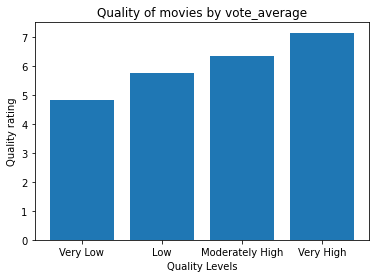

In [40]:
#creating a barchart for Quality average rating for each level of quality
location = [1,2,3,4]
heights = mean_qualitym
labels = ['Very Low','Low','Moderately High','Very High']
plt.bar(location,heights,tick_label = labels)
plt.title('Quality of movies by vote_average')
plt.xlabel('Quality Levels')
plt.ylabel('Quality rating');

#### Grouping directors with the quality of movies they make

In [41]:
#Using groupby to know the number of movies each director has an the quality level of each movie
df.groupby(['director'])['movie_quality'].value_counts()

director                          
Abe Sylvia         Moderately High    1
                   Very Low           0
                   Low                0
                   Very High          0
Adam Brooks        Moderately High    1
                                     ..
Zal Batmanglij     Very High          0
Ã‰mile Gaudreault  Very Low           1
                   Low                0
                   Moderately High    0
                   Very High          0
Name: movie_quality, Length: 5360, dtype: int64

#### Which directors made movies of the best quality and number of high quality movies they made

In [42]:
#Using query and value_counts functions to extract the top 10 directors who have movies of the best quality and to find out which directors produce themost number of quality movies.
top_directors = df.query('movie_quality == "Very High"')['director'].value_counts().head(10)

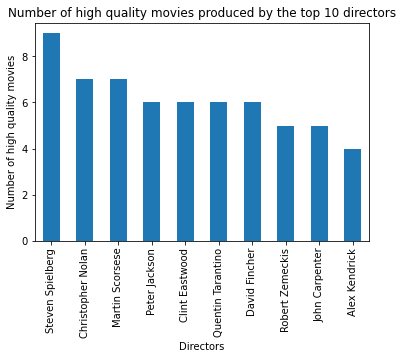

In [43]:
top_directors.plot(kind='bar')
plt.title('Number of high quality movies produced by the top 10 directors')
plt.xlabel('Directors')
plt.ylabel('Number of high quality movies');

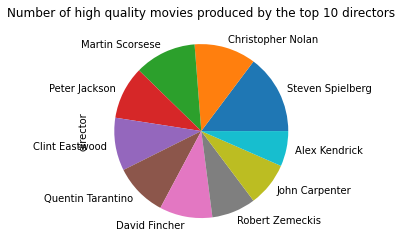

In [44]:
top_directors.plot(kind='pie')
plt.title('Number of high quality movies produced by the top 10 directors');

### Research Question 2  Does the profit earned have any correlation to the vote average?

In [45]:
#Feature Engineering
#Creating a new profit column in the dataframe
df['profit'] = df['revenue'] - df['budget']
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10724      74974493
10759      69700000
10760     138300000
10817        321952
10819      78000000
Name: profit, Length: 1992, dtype: int64

In [46]:
#Finding out if the quality of movies affects the profit made
ratings_profit = df.groupby('movie_quality')['profit'].mean().astype(int)

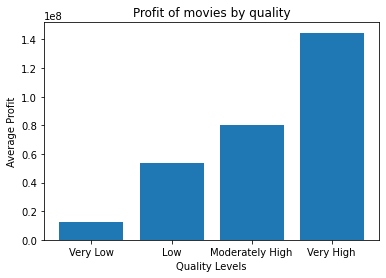

In [47]:
#creating a barchart for Quality average rating for each level of quality
location = [1,2,3,4]
heights = ratings_profit
labels = ['Very Low','Low','Moderately High','Very High']
plt.bar(location,heights,tick_label = labels)
plt.title('Profit of movies by quality')
plt.xlabel('Quality Levels')
plt.ylabel('Average Profit');

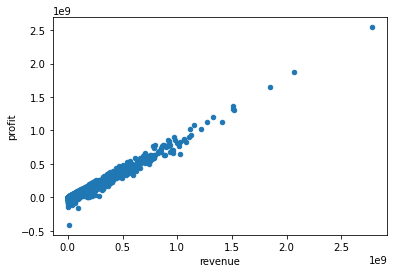

In [48]:
#Creating a scatter plot to show the correlation of revenue against profit
df.plot(kind='scatter', x='revenue',y='profit');

<AxesSubplot:>

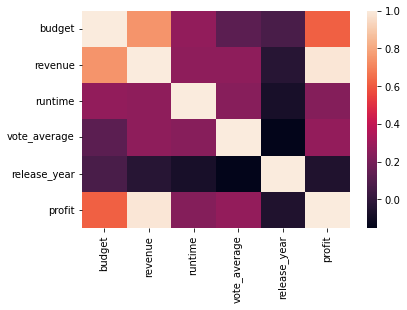

In [49]:
sns.heatmap(df.corr())

### Research Question 3 Does the runtime affect profit made by movie

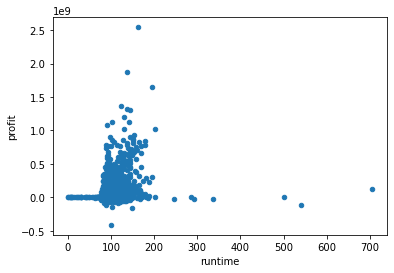

In [50]:
df.plot(kind='scatter',x='runtime',y='profit');

<a id='conclusions'></a>
## Conclusions


1. **Does the quality level affect the average quality rating of a movie?**
    > From the first bar plot, we can conclude that the quality level of a movie affects the quality rating that it receives from viewers. The higher the quality level the higher the quality rating and vice versa.

2. **Does the director of a movie affect the quality of movie produced?**
    > From the analysis above, we can tell that the director chosen for a movie production affects the quality of movie produced. 
    > We also get to find out the top ten movie directors with the most number of high movie ratings to be :
        1. Steven Spielberg
        2. Christopher Nolan
        3. Martin Scorsese
        4. Peter Jackson
        5. Clint Eastwood
        6. Quentin Tarantino
        7. David Fincher
        8. Robert Zemeckis
        9. John Carpenter
        10. Alex Kendrick

3. **Does the quality level of a movie affect the profit earned?**
> After analysis and visualising our findings using the barchart, we find that movies of the highest quality earn more profit.

4. **What is the correlation between revenue and profit earned?**
> Revenue and profit have a positive and strong correlation 


5. **What is the correlation between runtime and profit?**
> From the correlation heatmap and scatterplot, we can tell that runtime does not have an effect on profits earned by a movie since the two variables have weak correlation.